In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
filter_steam_df = pd.read_csv('filter_steam.csv')
user_item_df = pd.read_csv('user_item.csv')

In [53]:
filter_steam_df.sample()

,publisher,genres,price,developer,release_date
12776,Xorcerox,"['Adventure', 'Casual', 'Indie', 'Simulation']",0.99,Xorcerox,2017-04-06


In [55]:
user_item_df.head()

,user_id,items_count,steam_id,user_url,items,item_id,item_name
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '10', 'item_name': 'Counter-Strike...","['10', '20', '30', '40', '50', '60', '70', '13...","['Counter-Strike', 'Team Fortress Classic', 'D..."
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '20', 'item_name': 'Team Fortress ...","['10', '20', '30', '40', '50', '60', '70', '13...","['Counter-Strike', 'Team Fortress Classic', 'D..."
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '30', 'item_name': 'Day of Defeat'...","['10', '20', '30', '40', '50', '60', '70', '13...","['Counter-Strike', 'Team Fortress Classic', 'D..."
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '40', 'item_name': 'Deathmatch Cla...","['10', '20', '30', '40', '50', '60', '70', '13...","['Counter-Strike', 'Team Fortress Classic', 'D..."
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '50', 'item_name': 'Half-Life: Opp...","['10', '20', '30', '40', '50', '60', '70', '13...","['Counter-Strike', 'Team Fortress Classic', 'D..."


In [56]:
print(filter_steam_df.info())
print(filter_steam_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22819 entries, 0 to 22818
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22809 non-null  object
 1   genres        22819 non-null  object
 2   price         22819 non-null  object
 3   developer     22819 non-null  object
 4   release_date  22819 non-null  object
dtypes: object(5)
memory usage: 891.5+ KB
None
       publisher      genres  price       developer release_date
count      22809       22819  22819           22819        22819
unique      7915         842    141           10376         3220
top      Ubisoft  ['Action']   9.99  Dovetail Games   2012-10-16
freq         368        1579   3196             253          100


In [31]:
print(user_item_df.info())
print(user_item_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      500 non-null    object
 1   items_count  500 non-null    int64 
 2   steam_id     500 non-null    int64 
 3   user_url     500 non-null    object
 4   items        500 non-null    object
 5   item_id      500 non-null    object
 6   item_name    500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB
None
       items_count      steam_id
count   500.000000  5.000000e+02
mean    549.506000  7.656120e+16
std     304.017268  3.228350e+07
min     277.000000  7.656120e+16
25%     277.000000  7.656120e+16
50%     277.000000  7.656120e+16
75%     888.000000  7.656120e+16
max     888.000000  7.656120e+16


In [32]:
# Contar numero de publishers en Steam


print(filter_steam_df['publisher'].nunique())

7915


## Revisar estructura de columnas del dataset reviews

In [58]:
user_item_df.sample(3)

,user_id,items_count,steam_id,user_url,items,item_id,item_name
100,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '62100', 'item_name': 'Chime', 'pl...","['10', '20', '30', '40', '50', '60', '70', '13...","['Counter-Strike', 'Team Fortress Classic', 'D..."
281,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"{'item_id': '30', 'item_name': 'Day of Defeat'...","['10', '80', '100', '300', '30', '40', '60', '...","['Counter-Strike', 'Counter-Strike: Condition ..."
432,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"{'item_id': '16040', 'item_name': 'Luxor: Ques...","['10', '80', '100', '300', '30', '40', '60', '...","['Counter-Strike', 'Counter-Strike: Condition ..."


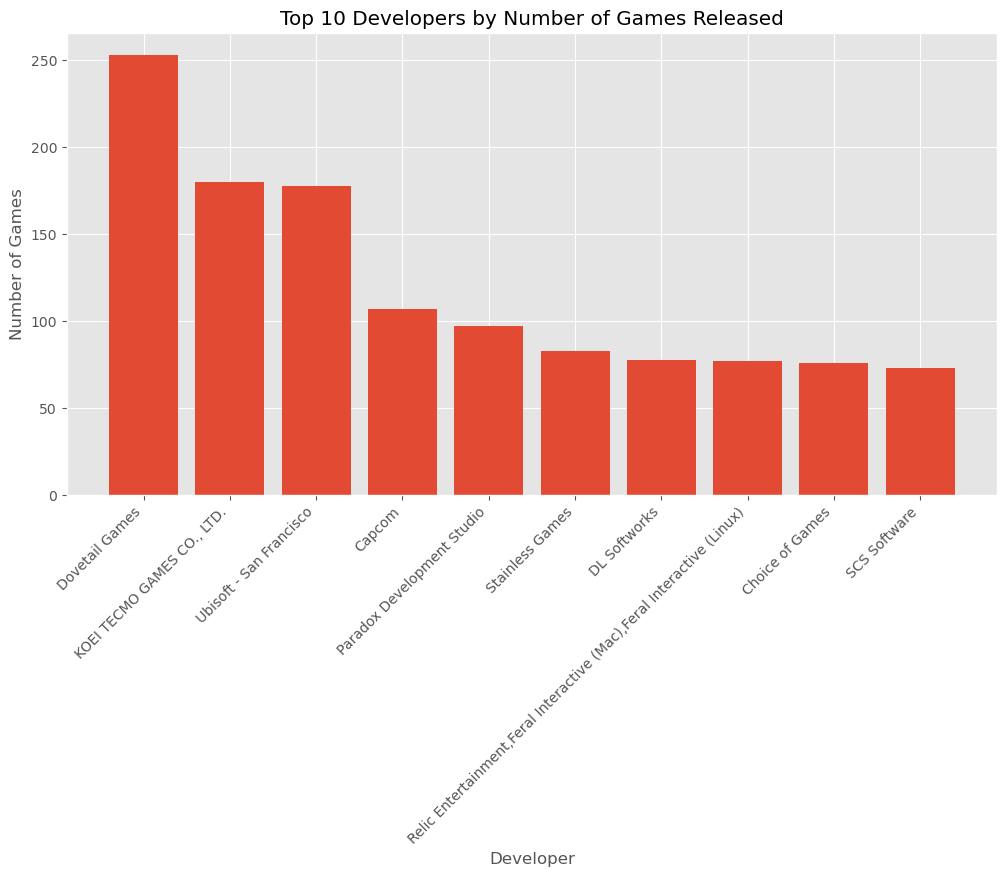

In [34]:
import matplotlib.pyplot as plt



# Group the data by developer and count the number of games for each developer
developer_counts = filter_steam_df['developer'].value_counts().reset_index()
developer_counts.columns = ['Developer', 'Number of Games']

# ordenar nro desarroladores de forma descendente
developer_counts = developer_counts.sort_values(by='Number of Games', ascending=False)

# Elegir top N desarrolladores (e.g., top 10)
top_n = 10
top_developers = developer_counts.head(top_n)


plt.figure(figsize=(12, 6))
plt.bar(top_developers['Developer'], top_developers['Number of Games'])
plt.title(f'Top {top_n} Developers by Number of Games Released')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

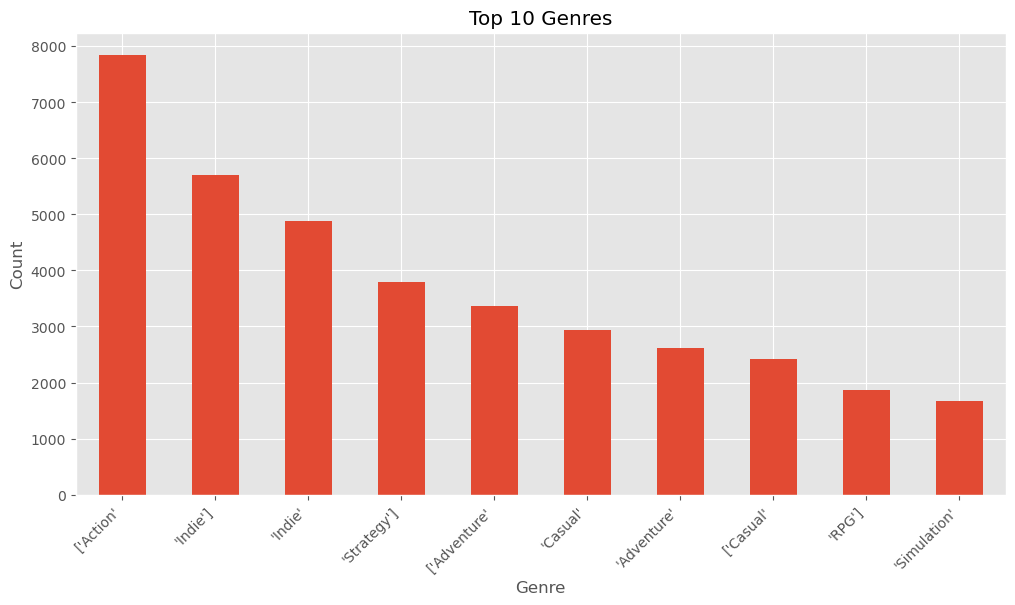

In [40]:
# Assuming the genre information is in a column named 'genres'
# Split the genres string into a list and flatten it
genres_list = filter_steam_df['genres'].str.split(',').explode()

# Remove leading and trailing whitespace from genre names
genres_list = genres_list.str.strip()

# Count the occurrences of each genre
genre_counts = genres_list.value_counts()

# Select the top N genres for the ranking (e.g., top 10)
top_n = 10
top_genres = genre_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title(f'Top {top_n} Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

## NLP

Idea: crear un subset con columnas user_id y reviews, usar machine learning NLP y guardar resultados en otra columna 'sentiment'

In [36]:
# Load the user_review.csv file into a DataFrame
user_review_df = pd.read_csv('user_review.csv')

# Display the first few rows of the DataFrame to inspect the data
user_review_df.sample(5)

,{'user_id':,'br33ny','user_url':,'http://steamcommunity.com/id/br33ny','reviews':,[{'funny':,'','posted':,'Posted,December,...,Unnamed: 2245,Unnamed: 2246,Unnamed: 2247,Unnamed: 2248,Unnamed: 2249,Unnamed: 2250,Unnamed: 2251,Unnamed: 2252,Unnamed: 2253,Unnamed: 2254
15,{'user_id':,'76561198146806915','user_url':,'http://steamcommunity.com/profiles/7656119814...,'reviews':,[{'funny':,'','posted':,'Posted,October,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,{'user_id':,'76561198162065948','user_url':,'http://steamcommunity.com/profiles/7656119816...,'reviews':,[{'funny':,'','posted':,'Posted,November,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,{'user_id':,'W3LSHY','user_url':,'http://steamcommunity.com/id/W3LSHY','reviews':,[{'funny':,'','posted':,'Posted,March,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,{'user_id':,'76561198208507532','user_url':,'http://steamcommunity.com/profiles/7656119820...,'reviews':,[{'funny':,'2,people,found,this,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,{'user_id':,'MeloncraftLP','user_url':,'http://steamcommunity.com/id/MeloncraftLP','reviews':,[{'funny':,'1,person,found,this,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


def userdata( User_id : str ): Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items. user_items

def countreviews( YYYY-MM-DD y YYYY-MM-DD : str ): Cantidad de usuarios que realizaron reviews entre las fechas dadas y, el porcentaje de recomendación de los mismos en base a reviews.recommend. user_reviews

def genre( género : str ): Devuelve el puesto en el que se encuentra un género sobre el ranking de los mismos analizado bajo la columna PlayTimeForever. user_items

def userforgenre( género : str ): Top 5 de usuarios con más horas de juego en el género dado, con su URL y user_id. user_items

def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. Ejemplo de salida: Activision Año Contenido Free 2023 27% 2022 25% xxxx xx%

def sentiment_analysis( empresa desarrolladora : str ): Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento. steam_games

In [59]:
def get_genre_ranking(top_n: int = 10):
    # Extract and preprocess the genre information
    genres_list = filter_steam_df['genres'].str.split(',').explode()
    genres_list = genres_list.str.strip()

    # Count the occurrences of each genre
    genre_counts = genres_list.value_counts()

    # Select the top N genres for the ranking
    top_genres = genre_counts.head(top_n)

    # Create a dictionary to return the ranking
    ranking = {genre: count for genre, count in top_genres.items()}
    return ranking

In [60]:
result = get_genre_ranking(2)
print(result)

{"['Action'": 7851, "'Indie']": 5709}


{"['Action'": 7851}